<a href="https://colab.research.google.com/github/Kvmeena12/Linear_Regression_Student_Performace_Index/blob/main/Lin_Reg_implementation_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# import Lin_Reg_Model

#simple Linear

Data Processing

In [ ]:
# loading the data from csv file to pandas dataframe
# salary_data = pd.read_csv('/content/salary_data.csv')

In [ ]:
# # printing the first 5 rows of the dataframe
# salary_data.head()

In [ ]:
# number of rows & columns in the dataset
# salary_data.shape

In [ ]:
# # checking for missing values
# salary_data.isnull().sum()

Splitting the feature & target

In [ ]:
# X = salary_data.iloc[:,:-1].values
# Y = salary_data.iloc[:,1].values

In [ ]:
# print(X)

In [ ]:
# print(Y)

Splitting the data to training data & Test data

In [ ]:
#  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.33,
#                                                      random_state = 2 )

Train the Logistic Regression Model

In [ ]:
# model = Lin_Reg_Model.Linear_Regression_scratch(learning_rate=0.01, no_of_iterations=1000)

In [ ]:
model.fit(X_train, Y_train)

In [ ]:
# # print the parameters

# print('weight = ', model.w[0])
# print('bias = ', model.b)

Predict the salary value for test data

In [ ]:
# test_data_prediction = model.predict(X_test)

In [ ]:
# print(test_data_prediction)

Visualizing the predicted values and actual values

In [ ]:
# plt.scatter( X_test, Y_test, color = 'red' )
# plt.plot( X_test, test_data_prediction, color = 'blue' )
# plt.xlabel( 'Work Experience' )
# plt.ylabel( 'Salary' )
# plt.title( 'Salary vs Experience' )
# plt.show()

#**Part-2 Multiple Linear Regression**

**1.Data Import**

In [ ]:

filename = "/content/Student_Performance.csv"
df = pd.read_csv(filename)

**2.Exploratory Data Analysis**

In [ ]:
# view the dimensions of dataframe df
print("Shape of dataframe df: {}".format(df.shape))

Shape of dataframe df: (10000, 6)


We can see that there are 10001 rows and 6 columns in the dataset. Next, we should get an insight about the dataset.

In [ ]:
# view the top five rows of dataframe df
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


**Explore types of variables**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


We can see that there are categorical and numerical variables in the dataset. Numerical variables have data types int64 and categorical variables are those of type object.

In [ ]:
categorical = [col for col in df.columns if df[col].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))
print(categorical)

There are 1 categorical variables
['Extracurricular Activities']


In [ ]:
# view the top five rows of categorical variables
df[categorical].head()

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No


In [ ]:
# exploring the categories in Extracurricular Activities	Name column
df['Extracurricular Activities'].value_counts()

,count
Extracurricular Activities,
No,5052
Yes,4948


**No** is the most frequent category in the Extracurricular Activities Name column. where **No** mean Student not do Extracurricular Activities

In [ ]:
# find numerical variables
numerical = [col for col in df.columns if df[col].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 5 numerical variables


In [ ]:
# view numerical variables
print(numerical)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


In [ ]:
# view numerical variables
print(numerical)

['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']


**Summary:types of variables**

**Estimate correlation coefficients:**
  we can compute the standard correlation coefficient (also called Pearson's r) between every pair of attributes.
We use here df.corr()

In [ ]:
# Calculate the correlation matrix, include only numeric values
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
Hours Studied,1.000000,-0.012390,0.001245,0.017463,0.373730
Previous Scores,-0.012390,1.000000,0.005944,0.007888,0.915189
Sleep Hours,0.001245,0.005944,1.000000,0.003990,0.048106
Sample Question Papers Practiced,0.017463,0.007888,0.003990,1.000000,0.043268
Performance Index,0.373730,0.915189,0.048106,0.043268,1.000000


In [ ]:
corr_matrix['Performance Index'].sort_values(ascending=False)

,Performance Index
Performance Index,1.000000
Previous Scores,0.915189
Hours Studied,0.373730
Sleep Hours,0.048106
Sample Question Papers Practiced,0.043268


**Interpretation of correlation coefficient**

The correlation coefficient ranges from -1 to +1.
When it is close to +1, this signifies that there is a strong positive correlation. So, we can see that there is a strong positive correlation between Performance Index and Previous Scores.

When it is clsoe to -1, it means that there is a strong negative correlation. So, there is a small negative correlation between Performance Index and Sleep Hours.

In [ ]:
import seaborn as sns

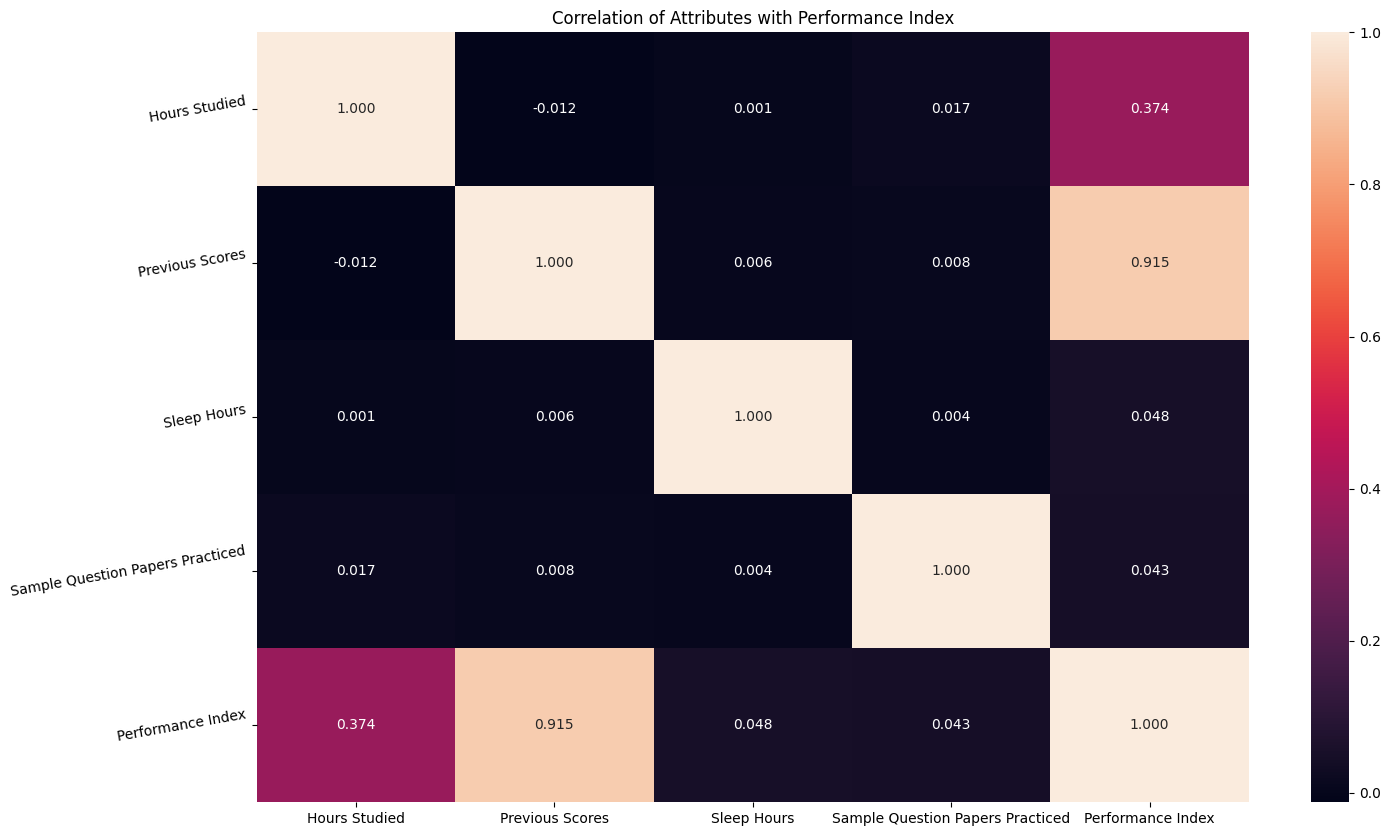

In [ ]:
plt.figure(figsize=(16,10))
plt.title('Correlation of Attributes with Performance Index')
a = sns.heatmap(corr_matrix, annot=True, fmt='.3f', linecolor='blue')
a.set_xticklabels(a.get_xticklabels(), rotation=0)
a.set_yticklabels(a.get_yticklabels(), rotation=10)
plt.show()

**Detect problems within variables**

In [ ]:
#is there missing values ?
df.isnull().sum()

,0
Hours Studied,0
Previous Scores,0
Extracurricular Activities,0
Sleep Hours,0
Sample Question Papers Practiced,0
Performance Index,0


There is not any misiing values

**Outliers in discrete variables**

In [ ]:
# let's view the summary statistics of the dataset
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [ ]:
# outlies #in discrete variables

for var in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    print(df[var].value_counts() / float(len(df))) # Use float instead of np.float
    print()

Hours Studied
1    0.1152
6    0.1133
7    0.1129
3    0.1119
9    0.1115
5    0.1094
8    0.1088
4    0.1085
2    0.1085
Name: count, dtype: float64

Previous Scores
54    0.0216
87    0.0208
56    0.0192
62    0.0184
89    0.0182
60    0.0181
53    0.0181
77    0.0181
52    0.0176
58    0.0176
57    0.0176
49    0.0175
66    0.0175
65    0.0175
84    0.0175
91    0.0175
97    0.0174
79    0.0174
40    0.0173
83    0.0173
75    0.0172
70    0.0172
93    0.0172
47    0.0172
92    0.0172
90    0.0172
42    0.0171
44    0.0170
48    0.0170
95    0.0169
41    0.0169
67    0.0168
43    0.0167
73    0.0166
61    0.0165
78    0.0165
88    0.0164
59    0.0163
63    0.0163
46    0.0163
86    0.0162
81    0.0161
71    0.0159
99    0.0159
85    0.0159
96    0.0159
98    0.0158
45    0.0154
69    0.0153
80    0.0153
68    0.0153
82    0.0148
94    0.0148
72    0.0148
64    0.0147
55    0.0144
74    0.0143
76    0.0142
51    0.0140
50    0.0123
Name: count, dtype: float64

Sleep Hours
8    0.1804


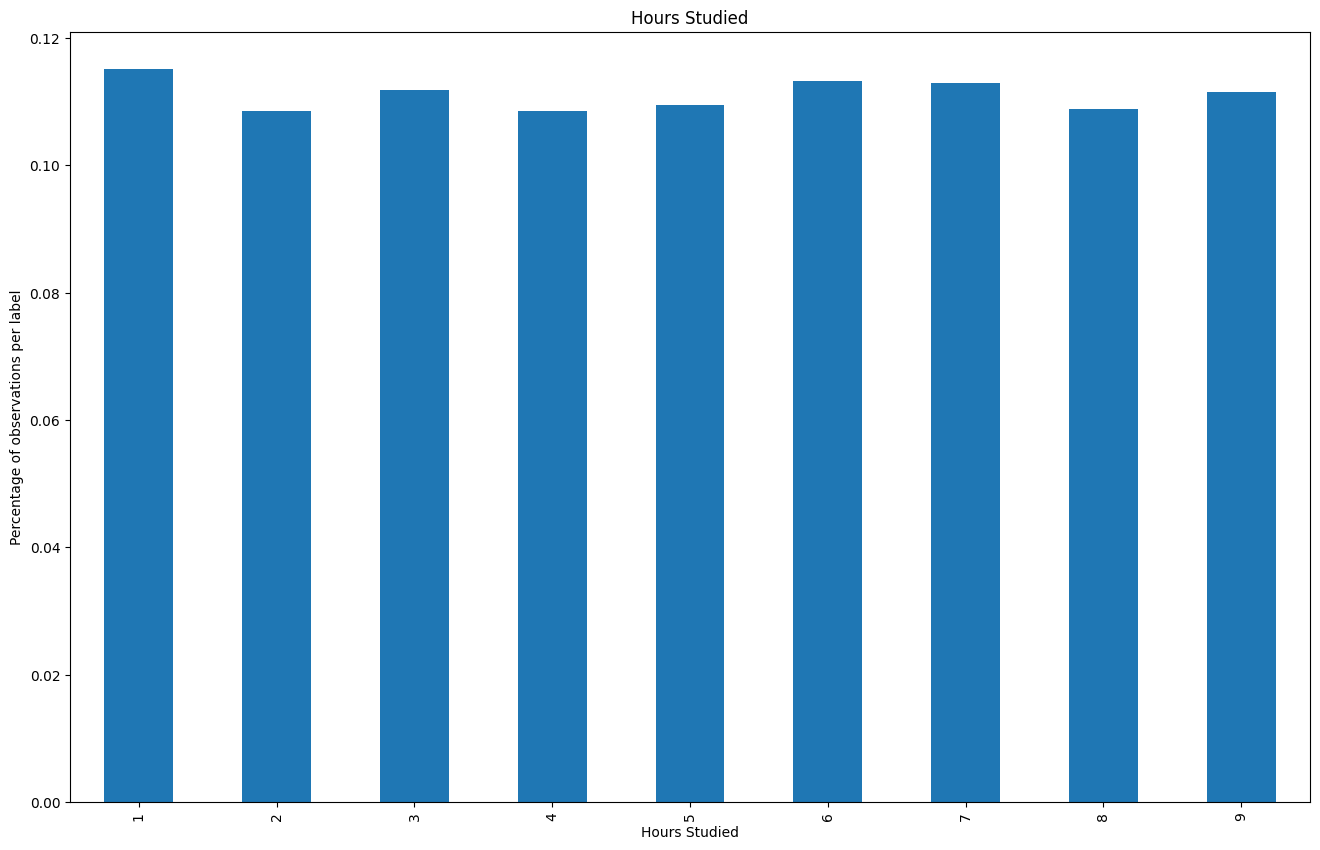

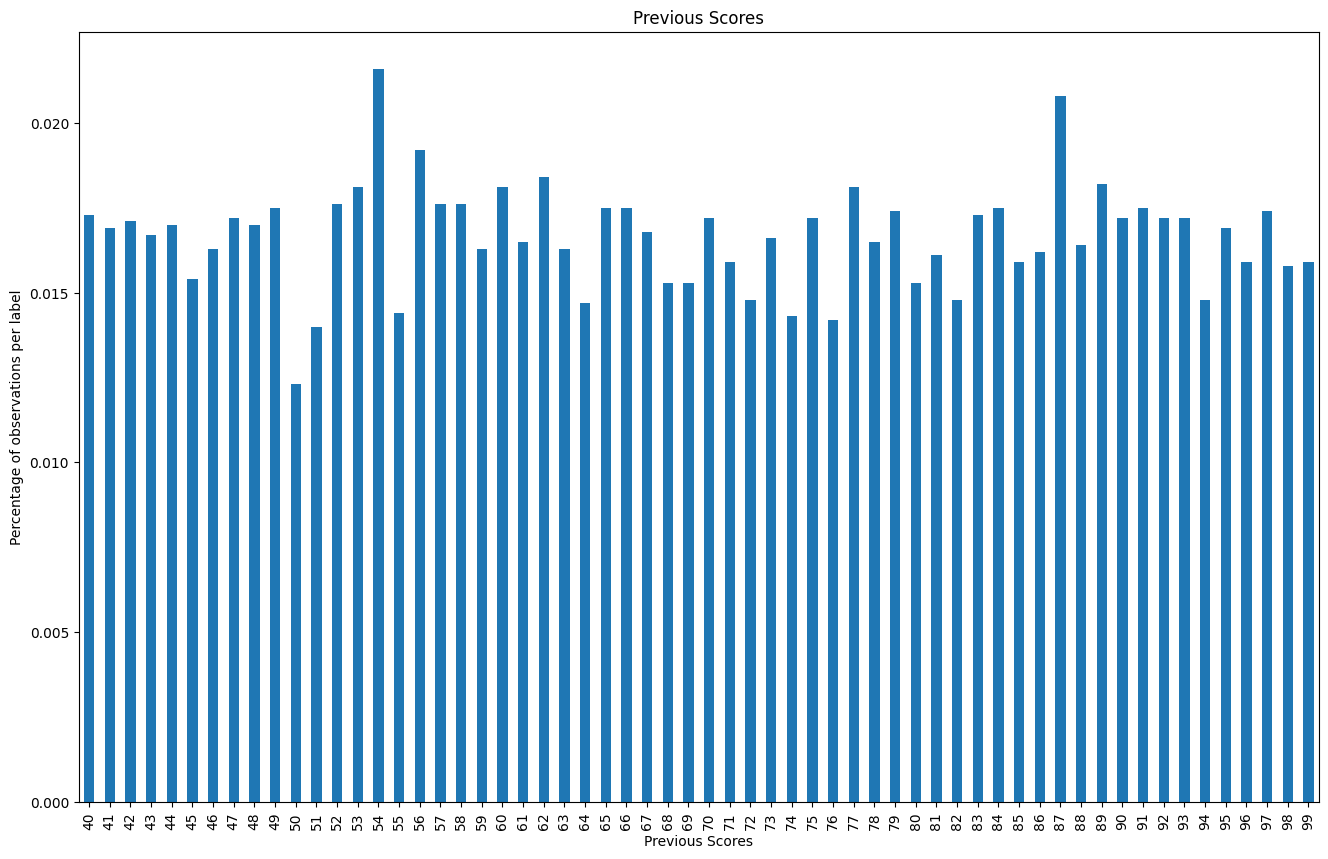

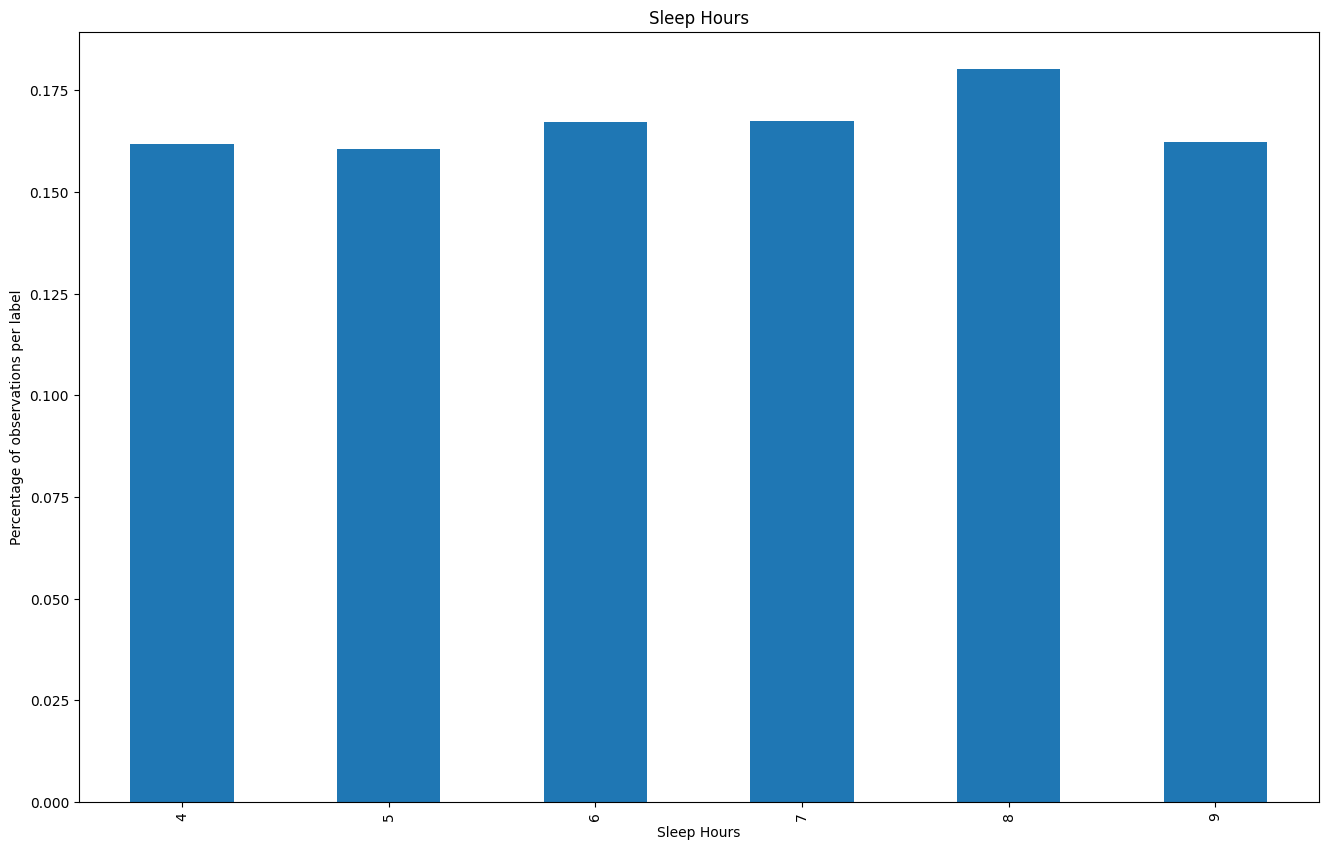

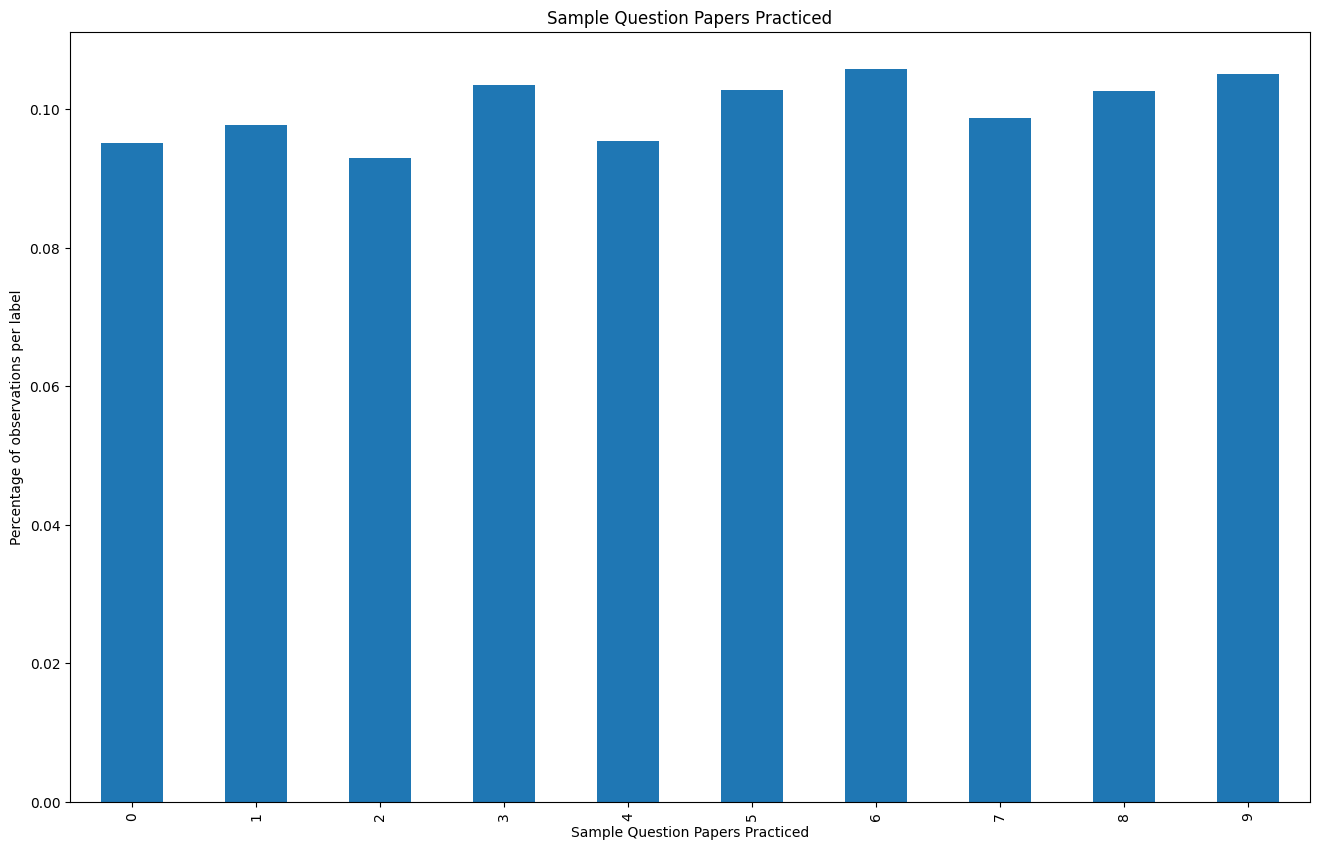

In [ ]:
# detect outliers in discrete variables
for var in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']:
    plt.figure(figsize=(16,10))
    (df.groupby(var)[var].count() / len(df)).plot.bar() # Removed np.float
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

#Linear Regression Modeling

Now, I discuss the most important part of this project which is the Linear Regression model building.

First of all, I will divide the dataset into categorical and numerical variables.

In [ ]:
# To get categorical columns
df_cat = df.select_dtypes(include=['object', 'category'])
# To get numerical columns
df_num = df.select_dtypes(include=['number'])


In [ ]:
df_num.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,9,1,91.0
1,4,82,4,2,65.0
2,8,51,7,2,45.0
3,5,52,5,2,36.0
4,7,75,8,5,66.0


In [ ]:
df_cat.head()

,Extracurricular Activities
0,Yes
1,No
2,Yes
3,Yes
4,No


In [ ]:
X_Feature = df_num.iloc[:,0:4]
Y_target= df_num.iloc[:,-1]


In [ ]:
print(X_Feature)
print(Y_target)

      Hours Studied  Previous Scores  Sleep Hours  \
0                 7               99            9   
1                 4               82            4   
2                 8               51            7   
3                 5               52            5   
4                 7               75            8   
...             ...              ...          ...   
9995              1               49            4   
9996              7               64            8   
9997              6               83            8   
9998              9               97            7   
9999              7               74            8   

      Sample Question Papers Practiced  
0                                    1  
1                                    2  
2                                    2  
3                                    2  
4                                    5  
...                                ...  
9995                                 2  
9996                               

**Create separate train and test sets**

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X_Feature,Y_target,test_size=0.3,random_state=100)

**Check dimension of Train and test data**

In [ ]:
X_train.shape,Y_train.shape

((7000, 4), (7000,))

In [ ]:
X_test.shape,Y_test.shape

((3000, 4), (3000,))

In [ ]:
#  training data five rows
X_train.head()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
1191,8,51,8,4
4458,9,57,9,3
1131,8,62,6,8
9562,5,63,9,8
6579,2,46,7,1


In [ ]:
X_train.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced
count,7000.000000,7000.000000,7000.000000,7000.000000
mean,5.002857,69.291714,6.524571,4.531857
std,2.594849,17.291614,1.692447,2.873106
min,1.000000,40.000000,4.000000,0.000000
25%,3.000000,54.000000,5.000000,2.000000
50%,5.000000,69.000000,7.000000,5.000000
75%,7.000000,84.000000,8.000000,7.000000
max,9.000000,99.000000,9.000000,9.000000


**Feature Scaling**

In [ ]:
#why need to feature scaling in algo  study  first.
# Feature Scaling - I use the StandardScaler from sklearn

# import the StandardScaler class from preprocessing library
from sklearn.preprocessing import StandardScaler

# instantiate an object scaler
scaler = StandardScaler()

# fit the scaler to the training set and then transform it
X_train = scaler.fit_transform(X_train)

# transform the test set
X_test = scaler.transform(X_test)

In [ ]:
# fit the linear regression model
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
# Train the model using the training sets
lr.fit(X_train, Y_train)

LinearRegression()

**Predicting the results**

In [ ]:
# Predict on the test data set
Y_predict = lr.predict(X_test)

Predicted Performance Index   for  500 to 510 five values

In [ ]:
lr.predict(X_test)[500:510]

array([79.58669663, 73.98298058, 28.94327406, 62.89562846, 42.65577879,
       29.04401718, 65.47729354, 30.10915333, 41.00669431, 32.07995009])

**Model slope and intercept terms**

The slope parameters(m) are also called weights(w) or coefficients. They are stored in the  array format in coef_ attribute.

The offset or intercept(b) is also called bias stored in the intercept_ attribute.

So, the model slope is given by lr.coef_ and model intercept term is given by lr.intercept_.



In [ ]:
print("Number of coefficients:", len(lr.coef_))
print("Estimated coefficients: {}".format(lr.coef_))
print("Estimated intercept: {}".format(lr.intercept_))

Number of coefficients: 4
Estimated coefficients: [ 7.37735929 17.62840614  0.80372672  0.56520666]
Estimated intercept: 55.105142857142866


**Estimated Coefficients** represent the magnitude and direction of the relationship between each feature and the target variable.

**Estimated Intercept** is the predicted target value when all features are zero.


**Target=−33.756+2.843⋅X
1
​
 +1.020⋅X
2
​
 +0.475⋅X
3
​
 +0.197⋅X**4

#Evaluate model performance

Theory:

For this  linear regression model and use it to predict the results. i need to know performance. i  want to understand the outcome of this model and i  want to know whether the performance is acceptable or not. for  regression problems, there are many mathod aviable to evaluate the model performance.

(1)RMSE (Root Mean Square Error)

(2)R2 Score

(3)Overfitting Vs Underfitting

(4)Residual analysis

(5)Normality test

In [ ]:
# RMSE(Root Mean Square Error)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y_test, Y_predict)
rmse = np.sqrt(mse)
print("RMSE value : {:.2f}".format(rmse))

RMSE value : 2.09


In [ ]:
from sklearn.metrics import r2_score
# Assuming Y_test and Y_predict are already defined
r2 = r2_score(Y_test, Y_predict)
print(f"R² Score value: {r2:.2f}")


R² Score value: 0.99


In [ ]:
# Evaluating test set performance
print("Test set score: {:.2f}".format(lr.score(X_test, Y_test)))

Test set score: 0.99


In [ ]:
# Evaluate and print the R^2 score for the training set
training_score = lr.score(X_train, Y_train)
print(f"Training set score: {training_score:.3f}")

Training set score: 0.989


**Residual**

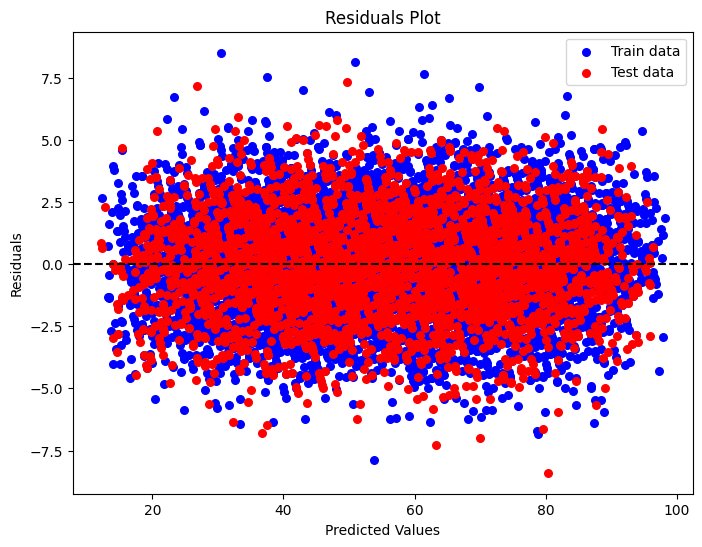

In [ ]:
# Predictions
Y_train_pred = lr.predict(X_train)
Y_test_pred = lr.predict(X_test)

# Residuals
residuals_train = Y_train - Y_train_pred
residuals_test = Y_test - Y_test_pred

# Plot residuals
plt.figure(figsize=(8, 6))

# Plotting residual errors in training data
plt.scatter(Y_train_pred, residuals_train, color='b', s=30, label='Train data')

# Plotting residual errors in test data
plt.scatter(Y_test_pred, residuals_test, color='r', s=30, label='Test data')

# Adding a horizontal line at y=0
plt.axhline(y=0, color='k', linestyle='--')

# Plot legend
plt.legend(loc='upper right')

# Plot title and labels
plt.title("Residuals Plot")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")

# Show plot
plt.show()

In [ ]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

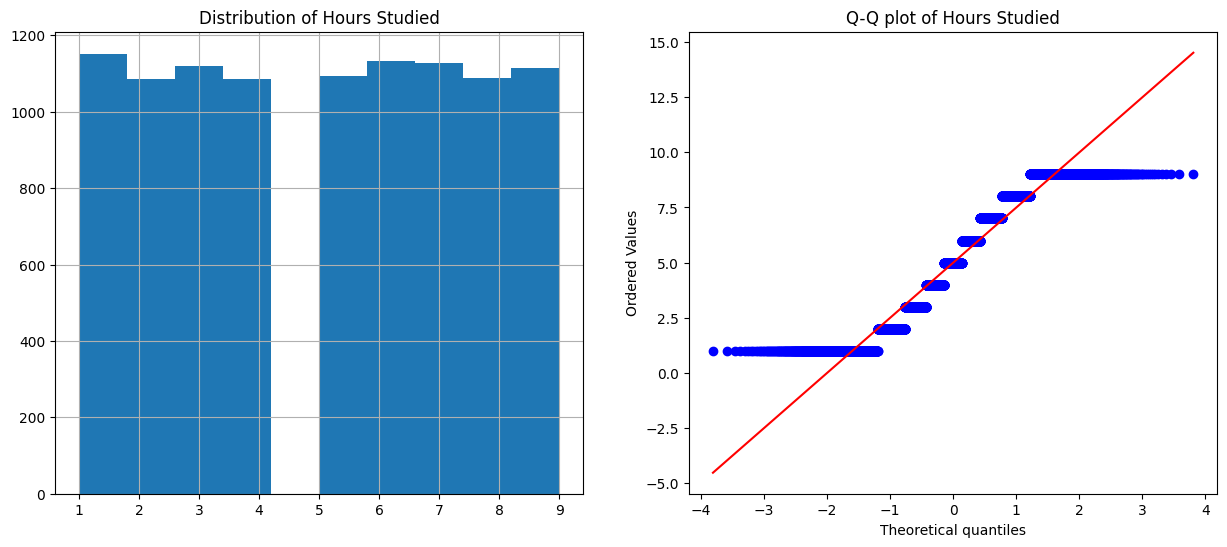

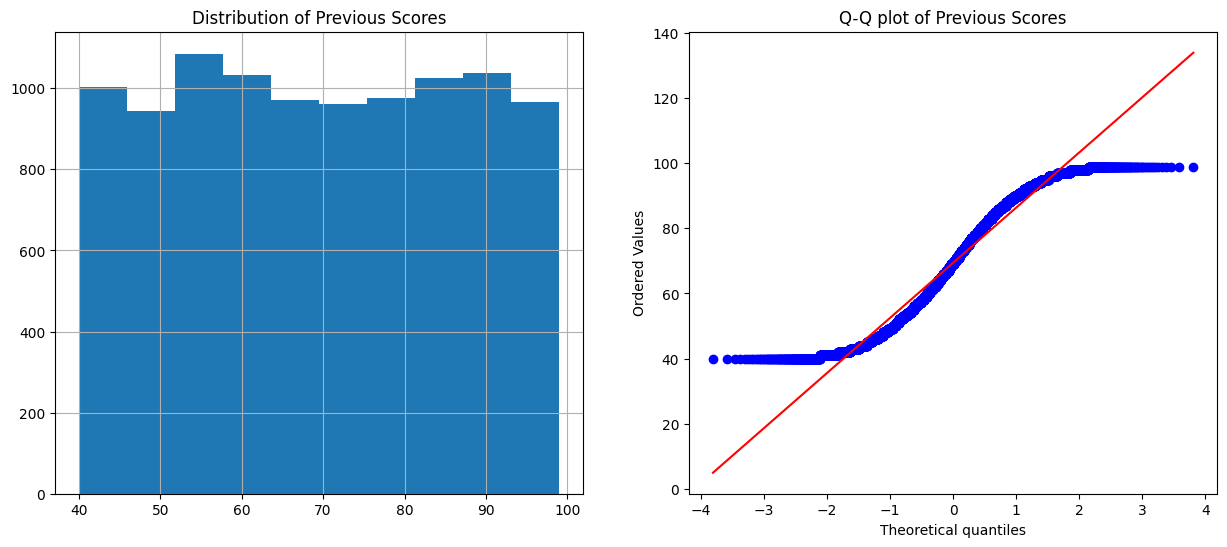

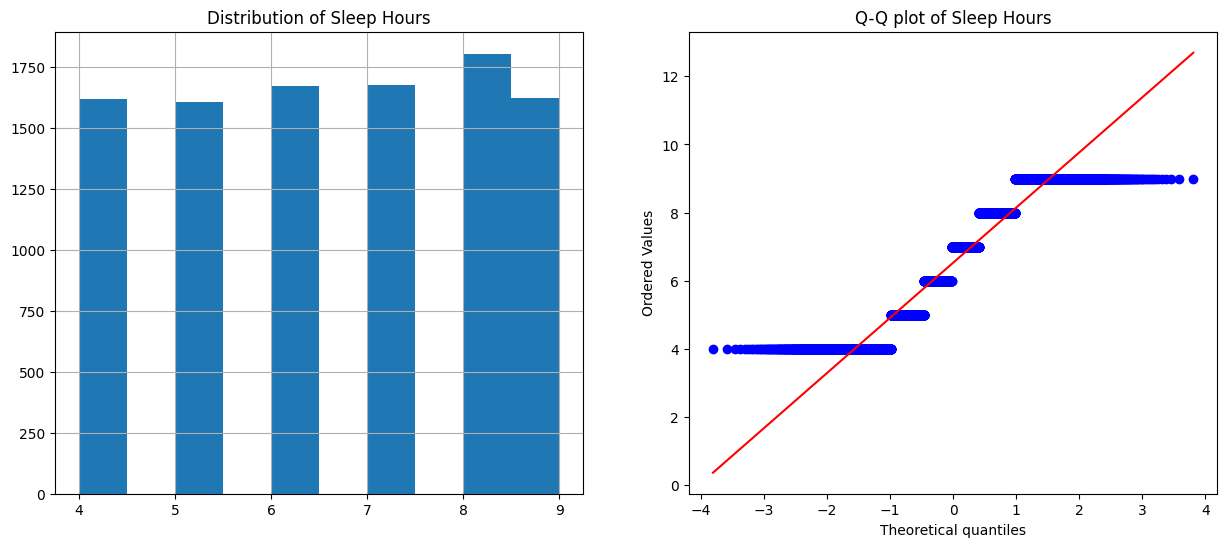

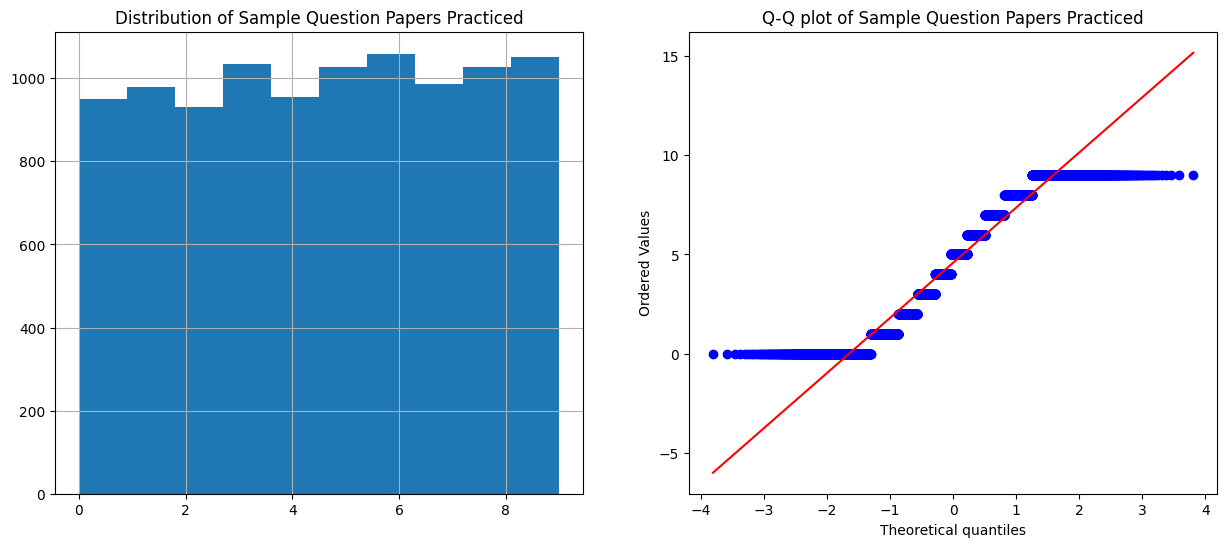

In [ ]:
# plotting the Q-Q plot

import pylab
import scipy.stats as stats

# Convert 'Extracurricular Activities' to numeric if necessary
# df['Extracurricular Activities'] = pd.to_numeric(df['Extracurricular Activities'])

for var in ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']: # Removed 'Extracurricular Activities'

    plt.figure(figsize=(15,6))

    plt.subplot(1, 2, 1)
    df[var].hist()
    plt.title('Distribution of '+ var)

    plt.subplot(1, 2, 2)
    stats.probplot(df[var], dist="norm", plot=pylab)
    plt.title('Q-Q plot of '+ var)

    plt.show()